## Mini Project/Sea Level Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress as st


##### Read dataset

In [2]:
df = pd.read_csv('epa-sea-level.csv')

##### Dataset overview

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
df.isnull().sum()

Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

In [5]:
df.shape

(134, 5)

#### Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

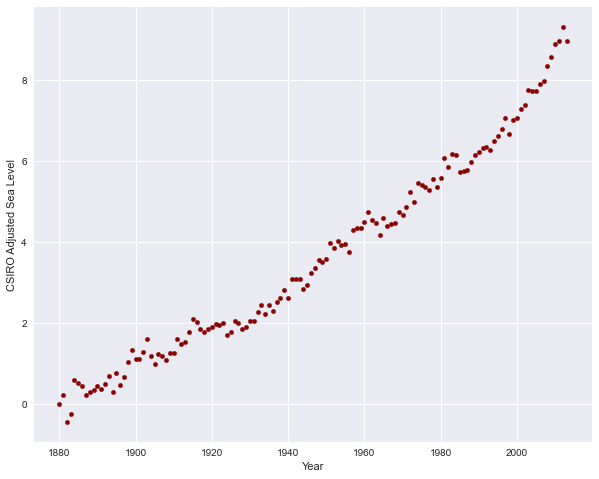

In [6]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', color='darkred', ax=ax)
plt.show()

##### Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit.

In [7]:
x = df['Year']
y = df['CSIRO Adjusted Sea Level']
slope, intercept, r_value, p_value, std_err = st(x,y)
print(f'slope: {slope}, y-intercept: {intercept}, r_value: {r_value}, p_value: {p_value}')

slope: 0.06304458401213482, y-intercept: -119.06594196773983, r_value: 0.984757131182585, p_value: 3.788696979113155e-102


##### Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

##### Creat np.array

In [8]:
year_till_2050 = np.arange(df['Year'][0], 2051)
year_till_2050

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 20

In [9]:
intercept_till_2050 = slope*year_till_2050 + intercept

##### Plot using np.array

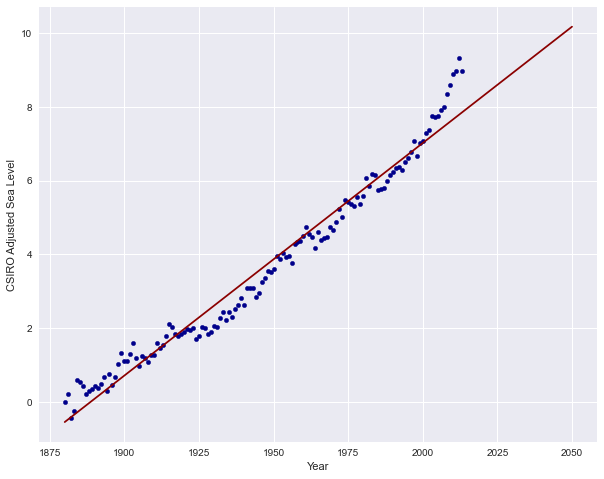

In [10]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', color='darkblue', ax=ax)

plt.plot(year_till_2050, intercept_till_2050, color='darkred')

plt.show()

#### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

##### Creat new dataset from the year 2000

In [11]:
df_2000 = df[df['Year']>=2000]
df_2000 = df_2000.reset_index(drop=True)
df_2000

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,2000,7.062992,6.791339,7.334646,6.920582
1,2001,7.287402,7.019685,7.555118,7.087460
2,2002,7.381890,7.110236,7.653543,7.319698
3,2003,7.759843,7.484252,8.035433,7.488353
4,2004,7.740157,7.464567,8.015748,7.507933
5,2005,7.744094,7.472441,8.015748,7.644563
6,2006,7.917323,7.645669,8.188976,7.697420
7,2007,7.996063,7.712598,8.279528,7.702147
8,2008,8.350394,8.078740,8.622047,7.907365
9,2009,8.586614,8.311024,8.862205,8.046354


##### Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit from the year 2000

In [12]:
x = df_2000['Year']
y = df_2000['CSIRO Adjusted Sea Level']
slope, intercept, r_value, p_value, std_err = st(x,y)
print(f'slope: {slope}, y-intercept: {intercept}, r_value: {r_value}, p_value: {p_value}')

slope: 0.1664272733318682, y-intercept: -325.7934668059649, r_value: 0.9762875716140618, p_value: 2.4388064141618245e-09


##### Create np.array from 2000 till 2050

In [13]:
year_2000_2050 = np.arange(df_2000['Year'][0], 2051)
year_2000_2050

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032,
       2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043,
       2044, 2045, 2046, 2047, 2048, 2049, 2050], dtype=int64)

In [14]:
intercept_2000_2050 = slope*year_2000_2050 + intercept

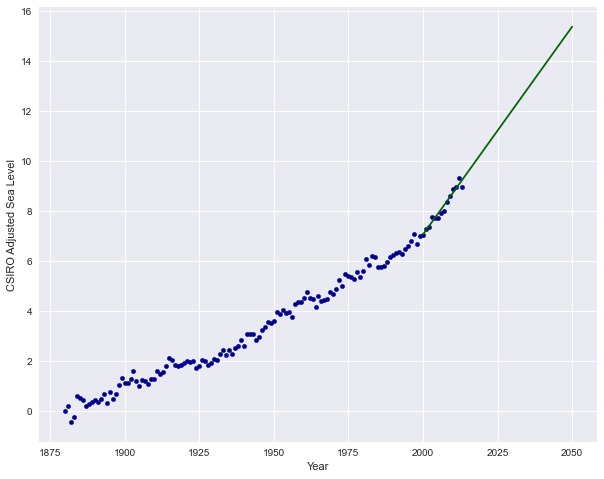

In [15]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', color='darkblue', ax=ax)

plt.plot(year_2000_2050, intercept_2000_2050, color='darkgreen')


plt.show()

#### Put created plots together 

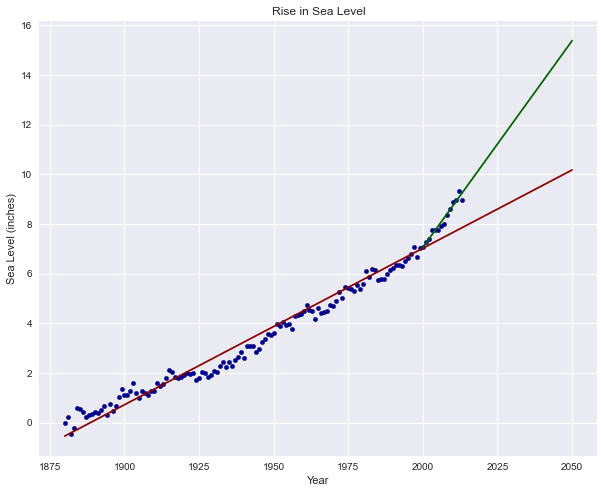

In [16]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10, 8))
df.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level', color='darkblue', ax=ax)

plt.plot(year_till_2050, intercept_till_2050, color='darkred')
plt.plot(year_2000_2050, intercept_2000_2050, color='darkgreen')


plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.show()